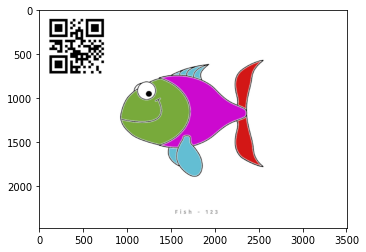

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = cv2.imread('fish.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

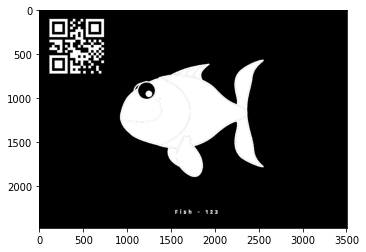

In [2]:
lower = np.array([0, 0, 0])
higher = np.array([250, 250, 250])
mask = cv2.inRange(img, lower, higher)
plt.imshow(mask, 'gray')

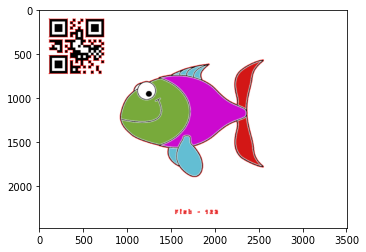

In [3]:
cont,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cont_image = cv2.drawContours(img, cont, -1, 255, 3)

plt.imshow(cont_image)

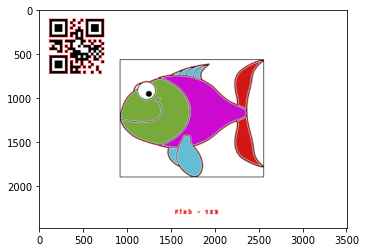

In [4]:
max_area = max(cont, key = cv2.contourArea)

x,y,w,h = cv2.boundingRect(max_area)
cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 0), 5)
plt.imshow(img)

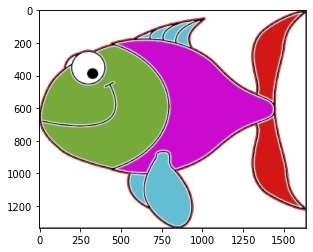

In [5]:
cropped_image = img[y: y+h, x: x+w]
plt.imshow(cropped_image)
plt.imsave('result.jpg', cropped_image)

True

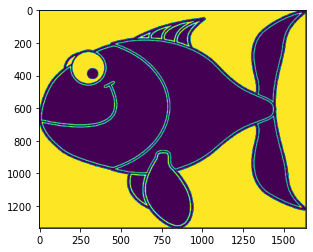

In [6]:

img = cv2.imread('result.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
plt.imshow(mask)

mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put mask into alpha channel of result
result = img.copy()

result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
# plt.imshow(result)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('retina_masked.png', result)